In [14]:
import cv2
image = cv2.imread('C:/Users/45115/Pictures/snipaste_20180818_091529.jpg', flags=cv2.IMREAD_COLOR)

In [15]:
import numpy as np
import pandas as pd
image.shape

(503, 1093, 3)

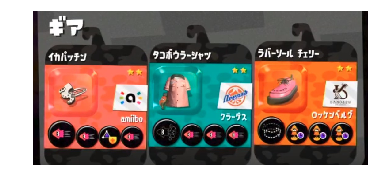

In [16]:
import matplotlib.pyplot as plt
plt.close()
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.savefig('output')

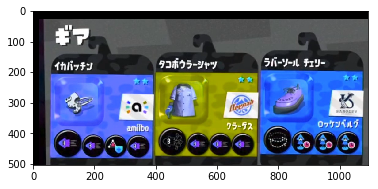

In [20]:
image = cv2.imread('C:/Users/45115/Pictures/snipaste_20180818_091529.jpg', flags=cv2.IMREAD_COLOR)
tx = 20
ty = 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
image_translated = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
plt.imshow(image_translated)

In [21]:
image_resized = cv2.resize(image, (2 * image.shape[1], image.shape[0]),interpolation=cv2.INTER_CUBIC)

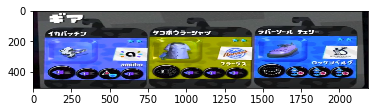

In [22]:
plt.imshow(image_resized)

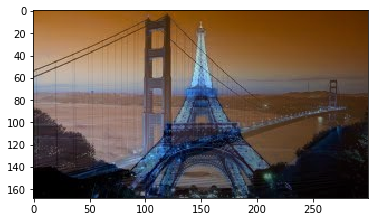

In [26]:
foreground = cv2.imread('C:/Users/45115/OneDrive/Python/CV/foreground.jpg',flags=cv2.IMREAD_COLOR)
background = cv2.imread('C:/Users/45115/OneDrive/Python/CV/background.jpg',flags=cv2.IMREAD_COLOR)
output = background.copy()
alpha=0.5
blended = cv2.addWeighted(foreground, alpha, background, 1.0 - alpha, 0, output)
plt.imshow(blended)

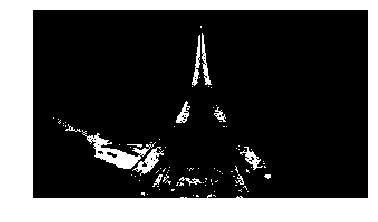

In [27]:
image = cv2.imread('C:/Users/45115/OneDrive/Python/CV/foreground.jpg', flags = cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, lane = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)
plt.close()
plt.axis('off')
plt.imshow(lane, cmap='gray')

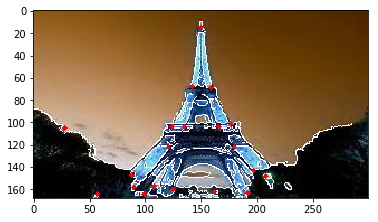

In [29]:
image = cv2.imread('C:/Users/45115/OneDrive/Python/CV/foreground.jpg', flags = cv2.IMREAD_COLOR)
edges = cv2.Canny(image, 200, 500)
corners = cv2.goodFeaturesToTrack(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32), 20, 0.01, 10).astype(np.int0)
edges = np.stack((edges, edges, edges), -1)
edge_and_corner = cv2.add(image, edges)
for corner in corners:
    x, y = corner[0]
    cv2.circle(edge_and_corner, (x, y), 2, 255, -1)
plt.imshow(edge_and_corner)

In [31]:
image1 = cv2.imread('C:/Users/45115/Pictures/Saved Pictures/11974897_p0.jpg')
image2 = cv2.imread('C:/Users/45115/Pictures/Saved Pictures/11974932_p0.jpg')
orb = cv2.ORB_create()
points1, desc1 = orb.detectAndCompute(image1, None)
points2, desc2 = orb.detectAndCompute(image2, None)

In [32]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
match = matcher.match(desc1, desc2)

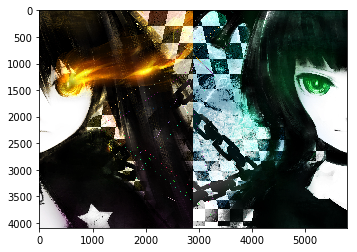

In [33]:
match = sorted(match, key = lambda x: x.distance)[:20]
result = cv2.drawMatches(image1, points1, image2, points2, match, None, flags=2)
plt.imshow(result)

In [34]:
face_cascade = cv2.CascadeClassifier('face.xml')
image = cv2.imread('lena.jpg', flags=cv2.IMREAD_COLOR)
result=image.copy()
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(image_gray, 1.3, 5)
for x, y, w, h in faces:
    cv2.rectangle(result, (x, y), (x + w, y + h), (255, 0, 0), 2)

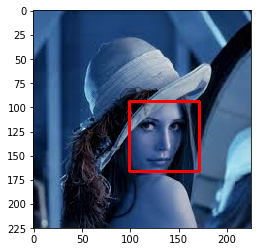

In [35]:
plt.imshow(result)